# Convolutional Neural Networks (CNNs)
---
 ## What are CNNs?
CNN is a special type of neural network which is based on the convolution operation. A generic CNN consists of a fewivation, Flatten, and Dense. It is mainly used for image-based tasks,  types of layers: Conv (convolutional) layer, MaxPooling, Dropout, Actthough they can be used in Audio Clasisfication and Natural Language Processing also. Over the years, a lot of research has been done to invent new architectures that are more optimised and suitable for various tasks, for example: ResNet, YoloV5, Xception, InceptionV3,etc.
   ![cnn](https://miro.medium.com/max/470/1*81Y95NKxLzXLEut7nepmZA.png)
## What are the different layers in a CNN?
- Conv (Convolutional) layer: 
- MaxPooling layer:
- Dropout layer: 
- Activation layer:
- Flatten layer:
- Dense Layer:

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input,GlobalMaxPooling2D,GlobalMaxPooling1D
from keras.models import Sequential
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
!nvidia-smi 

Wed Apr 13 13:17:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pwd


/content


In [5]:
!mkdir CatsnDogs

In [6]:
!unzip ./gdrive/MyDrive/cats_n_dogs/dogs-vs-cats.zip -d ./CatsnDogs

Archive:  ./gdrive/MyDrive/cats_n_dogs/dogs-vs-cats.zip
  inflating: ./CatsnDogs/sampleSubmission.csv  
  inflating: ./CatsnDogs/test1.zip   
  inflating: ./CatsnDogs/train.zip   


In [ ]:
!unzip ./CatsnDogs/test1.zip 

In [ ]:
!unzip ./CatsnDogs/train.zip -d ./train

In [8]:
!mkdir ./train/dog/

In [9]:
!mkdir ./train/cat/ 

In [10]:
import os 
import shutil
for f in os.listdir("./train/train/"):
    name = os.path.basename(f)
    if "cat" in name: 
      shutil.move("./train/train/"+str(f),"./train/cat/")
    else:
      shutil.move("./train/train/"+str(f),"./train/dog/")

In [24]:
!rm -f ./train/train

In [58]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("./train/",labels="inferred" ,label_mode="categorical",shuffle=True,validation_split=0.2,subset="training",seed=1,image_size=(224,224) )
val_data = tf.keras.preprocessing.image_dataset_from_directory("./train/",labels="inferred",label_mode="categorical",shuffle=True,validation_split=0.2,subset="validation",seed=1,image_size=(224,224) )

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [59]:
model =Sequential()
model.add(keras.Input(shape=(224,224,3)))
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(3))
model.add(Conv2D(32, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(3))
model.add(Conv2D(32, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(10))
model.add(Dense(2,activation="sigmoid"))


In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 110, 110, 32)      2432      
                                                                 
 conv2d_25 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                 

In [61]:
model.compile(optimizer="adam",loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics='accuracy')

In [62]:
train_data


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [63]:
model.fit(train_data,epochs=12,validation_data=val_data)

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


625/625 [==============================] - 55s 86ms/step - loss: 0.6760 - accuracy: 0.5960 - val_loss: 0.6491 - val_accuracy: 0.6392
Epoch 2/12
625/625 [==============================] - 52s 82ms/step - loss: 0.5906 - accuracy: 0.6952 - val_loss: 0.5487 - val_accuracy: 0.7368
Epoch 3/12
625/625 [==============================] - 54s 85ms/step - loss: 0.5299 - accuracy: 0.7400 - val_loss: 0.4780 - val_accuracy: 0.7710
Epoch 4/12
625/625 [==============================] - 53s 85ms/step - loss: 0.4499 - accuracy: 0.7929 - val_loss: 0.4494 - val_accuracy: 0.7918
Epoch 5/12
625/625 [==============================] - 53s 84ms/step - loss: 0.4024 - accuracy: 0.8177 - val_loss: 0.4240 - val_accuracy: 0.8048
Epoch 6/12
625/625 [==============================] - 51s 81ms/step - loss: 0.3540 - accuracy: 0.8459 - val_loss: 0.3731 - val_accuracy: 0.8352
Epoch 7/12
625/625 [==============================] - 51s 82ms/step - loss: 0.3232 - accuracy: 0.8589 - val_loss: 0.3691 - val_accuracy: 0.8486
Epo

In [ ]:
test_dir_list= ["./test1/10000.jpg","./test/test1/10004.jpg","./test/test1/10006.jpg","./test/test1/10018.jpg","./test/test1/1001.jpg",]

In [49]:
val_data=val_data.unbatch()

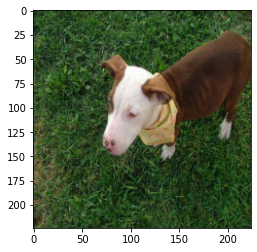

In [102]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
img_path = "./test1/10010.jpg"
img = mpimg.imread(img_path)
img = resize(img,(224,224))
imgplot = plt.imshow(img)
plt.show()

In [103]:
img = np.array(img,dtype=np.float32)
img = np.expand_dims(img,axis=0)
## Getting the model prediction on test images
prediction = model.predict(img)
print(prediction)
# if(prediction[0][0]>prediction[0][1]):
#   print("This is a dog!")
# else:
#   print("This is a cat!")

[[0.7731031  0.22532053]]


In [104]:
model.save_weights("./gdrive/MyDrive/cats_n_dogs")